# Interacción y HTML

In [1]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

RendererRegistry.enable('notebook')

Todos los gráficos creados con Altair se pueden exportar a HTML con una simple instrucción de Altair.

    chart.save('chart.html')
    
También los gráficos de este notebook se pueden exportar y conservarán su interactividad.
    
El fichero resultante tendrá la especificación del gráfico y llamará a librerías javascript para visualizarlo.

Ahora bien, por seguridad muchos navegadores no lo podrán visualizar directamente, será necesario subirlo a un servidor, o "simular" uno en nuestro ordenador con la instrucción:

    python –m http.server  
    
que ejecutaremos desde la cónsola en la carpeta donde hayamos guardado el gráfico.

Tras ello podremos abrir http://localhost:8888/  y consultar el gráfico.

Por defecto Altair ofrece interacción de panning, zooming y tooltips.

In [2]:
# Lo veremos con el dataset de cars 

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


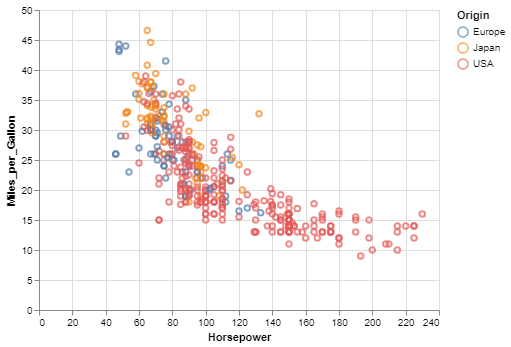

In [3]:
# En un simple gráfico de dispersión (scatterplot)
# podemos introducir un atributo como tooltip
# e indicar que el gráfico es interactivo para zoom y pan

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin',
    tooltip='Name'
).interactive()

In [4]:
# Veámoslo en una página web

graficocars = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin',
    tooltip='Name'
).interactive()

graficocars.save('graficocars.html')

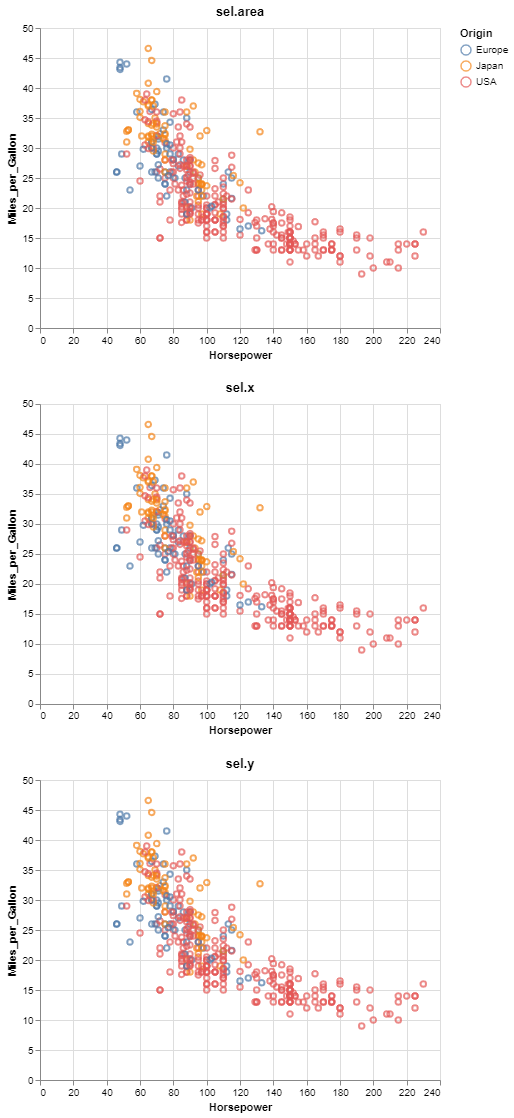

In [5]:
# También podemos crear selecciones 
# Y condicionar la codificación al area seleccionada
# alt.condition(condición, valor si True, valor si False)

#como areas

interval = alt.selection_interval()

seleccionarea = alt.Chart(cars,title="sel.area").mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

# como columnas

interval = alt.selection_interval(encodings=['x'])

seleccionx =alt.Chart(cars,title="sel.x").mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

# como filas

interval = alt.selection_interval(encodings=['y'])

selecciony =alt.Chart(cars,title="sel.y").mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

seleccionarea & seleccionx & selecciony



In [6]:
# Tambien podemos guardar combinaciones de gráficos en html

(seleccionarea & seleccionx & selecciony).save('graficoscombinados.html')

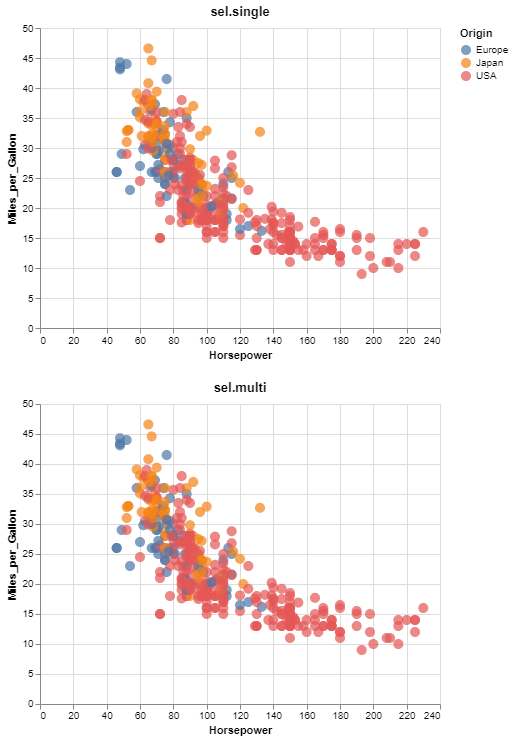

In [7]:
#Tambien podemos hacer selecciones unitarias
# y poner algunos atributos más como mouseover o True

single = alt.selection_single(on='mouseover', nearest=True)

seleccionsingle= alt.Chart(cars,title="sel.single").mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(single, 'Origin', alt.value('lightgray'))
).properties(
    selection=single
)

# O múltiples

multi = alt.selection_multi(on='mouseover', nearest=True)

seleccionmulti=alt.Chart(cars,title="sel.multi").mark_circle(size=100).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(multi, 'Origin', alt.value('lightgray'))
).properties(
    selection=multi
)

seleccionsingle & seleccionmulti

### Selecciones para cambiar escala o filtrar

Pero lo más interesante de las selecciones es vincular dos gráficos a partir de una selección 

In [8]:
# Veamos un ejemplo con el dataset del tiempo

weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


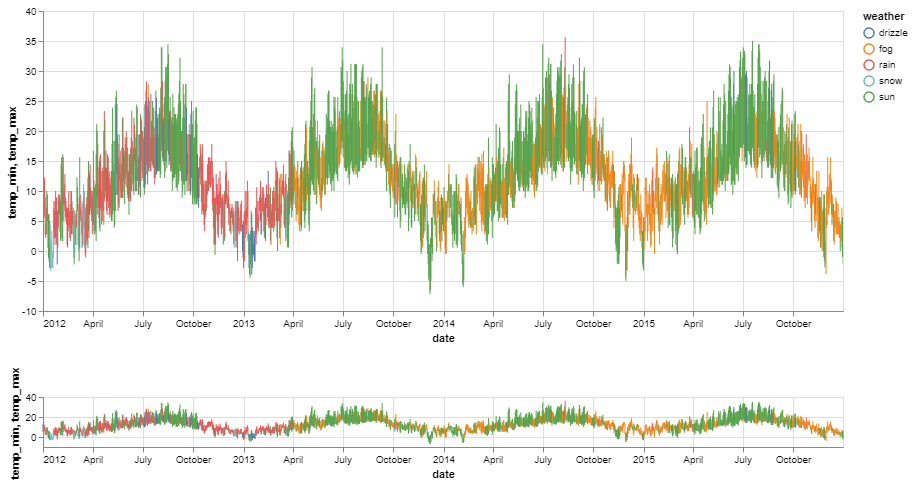

In [9]:
interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(weather).mark_rule().encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
).properties(
    width=800,
    height=300
).encode(
    x=alt.X('date:T', scale=alt.Scale(domain=interval.ref()))
)

view = alt.Chart(weather).mark_rule().encode(
    x='date:T',
    y='temp_min:Q',
    y2='temp_max:Q',
    color='weather:N'
).properties(
    width=800,
    height=50,
    selection=interval
)

base & view

In [10]:
# La versión html conserva la interacción

(base & view).save('graficoweather.html')

<h3 style="border-left:6px solid silver;background-color:#eeeeee;padding-left:10px"> Ejercicio 1</h3>

Aplicar este mismo modelo a los accidentes por día en Barcelona a partir del dataset 2018_accidentes_limpio.csv

Puedes usar un gráfico de líneas, y se recomienda graficar por días (timeUnit = 'yearmonthdate').

Recuerda que en un mismo día puede haber diversas entradas, y que en la y deberás usar un valor agregado como suma o media.

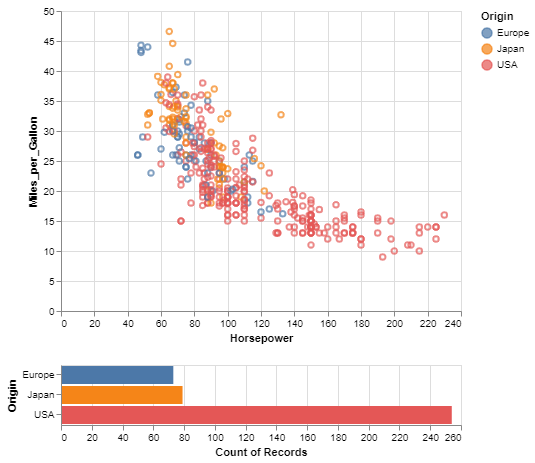

In [11]:
# En este ejemplo la selección se usa como filtro 
# de los valores en el histograma

interval = alt.selection_interval()

scatter = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(interval, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).transform_filter(
    interval
)

scatter & hist

In [12]:
# Aquí, de nuevo, la versión html conserva la interacción

(scatter & hist).save('graficocarsinteractivo.html')

<h3 style="border-left:6px solid silver;background-color:#eeeeee;padding-left:10px"> Ejercicio 2 (dificultad elevada) </h3>

Si te atreves puedes intentar replicar este gráfico pero haciendo que la selección vaya desde el gráfico de barras al scatterplot. En este caso la selección será múltiple, y la codificación será por color

    click = alt.selection_multi(encodings=['color'])
    
La transformación por filtrado y la selección deberán estar en el gráfico opuesto al ejemplo anterior. 

En el scatter el transform_filter

En el histograma el color según condición y la selección.

Una vez lo hayas conseguido puedes aplicarlo con el dataset de accidentes y un gráfico de barras que discrimine por distrito.

Este ejercicio presenta una alta dificultad.

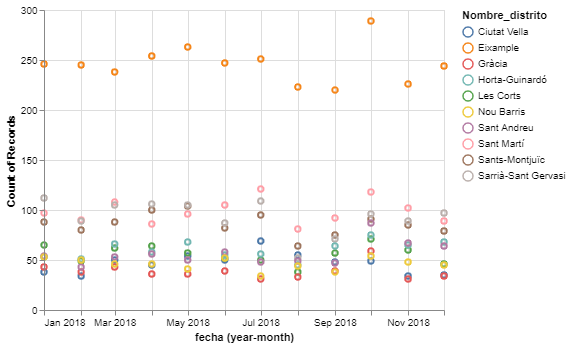

In [13]:
# Parte 2  Gráfico base

scatter_acc = alt.Chart('2018_accidentes_limpio.csv').mark_point(
).encode(
    x=alt.X('fecha:T', timeUnit = 'yearmonth'),
    y=alt.Y('count()',stack=None),
    color = 'Nombre_distrito:N',
    tooltip=['count()','Nombre_distrito:N']
)

scatter_acc